In [112]:
import numpy as np
import pandas as pd
from fbprophet import Prophet


In [122]:
df = pd.read_csv('dataset.csv')
df

,서울,관용,자가용,영업용,계,말소,실제대수
0,2010-01-01,10521,2729799,215977,2956297,8069,2948228
1,2010-02-01,10567,2734111,216815,2961493,6948,2954545
2,2010-03-01,10625,2736078,217805,2964508,8607,2955901
3,2010-04-01,10735,2739234,218088,2968057,7769,2960288
4,2010-05-01,10696,2734013,218591,2963300,7773,2955527
...,...,...,...,...,...,...,...
133,2021-02-01,"12,691","2,942,790","202,621","3,158,102",7489,3150613
134,2021-03-01,"12,610","2,943,678","202,422","3,158,710",10159,3148551
135,2021-04-01,"12,421","2,944,563","202,091","3,159,075",8827,3150248
136,2021-05-01,"12,426","2,946,076","202,127","3,160,629",7844,3152785


In [124]:
from fbprophet import Prophet 

In [125]:
df['ds']=df['서울']
df['y']=df['실제대수']
df

,서울,관용,자가용,영업용,계,말소,실제대수,ds,y
0,2010-01-01,10521,2729799,215977,2956297,8069,2948228,2010-01-01,2948228
1,2010-02-01,10567,2734111,216815,2961493,6948,2954545,2010-02-01,2954545
2,2010-03-01,10625,2736078,217805,2964508,8607,2955901,2010-03-01,2955901
3,2010-04-01,10735,2739234,218088,2968057,7769,2960288,2010-04-01,2960288
4,2010-05-01,10696,2734013,218591,2963300,7773,2955527,2010-05-01,2955527
...,...,...,...,...,...,...,...,...,...
133,2021-02-01,"12,691","2,942,790","202,621","3,158,102",7489,3150613,2021-02-01,3150613
134,2021-03-01,"12,610","2,943,678","202,422","3,158,710",10159,3148551,2021-03-01,3148551
135,2021-04-01,"12,421","2,944,563","202,091","3,159,075",8827,3150248,2021-04-01,3150248
136,2021-05-01,"12,426","2,946,076","202,127","3,160,629",7844,3152785,2021-05-01,3152785


In [126]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [149]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
498,2022-05-28,3.173036e+06,3.136384e+06,3.167939e+06,3.156919e+06,3.186374e+06,-19079.070166,-19079.070166,-19079.070166,-19079.070166,-19079.070166,-19079.070166,0.0,0.0,0.0,3.153957e+06
499,2022-05-29,3.173093e+06,3.142335e+06,3.172919e+06,3.156964e+06,3.186470e+06,-14266.619560,-14266.619560,-14266.619560,-14266.619560,-14266.619560,-14266.619560,0.0,0.0,0.0,3.158827e+06
500,2022-05-30,3.173150e+06,3.147310e+06,3.177158e+06,3.157009e+06,3.186546e+06,-9397.890063,-9397.890063,-9397.890063,-9397.890063,-9397.890063,-9397.890063,0.0,0.0,0.0,3.163752e+06
501,2022-05-31,3.173207e+06,3.151175e+06,3.182690e+06,3.157054e+06,3.186622e+06,-4586.769492,-4586.769492,-4586.769492,-4586.769492,-4586.769492,-4586.769492,0.0,0.0,0.0,3.168621e+06
502,2022-06-01,3.173264e+06,3.155721e+06,3.187133e+06,3.157084e+06,3.186697e+06,55.317088,55.317088,55.317088,55.317088,55.317088,55.317088,0.0,0.0,0.0,3.173320e+06


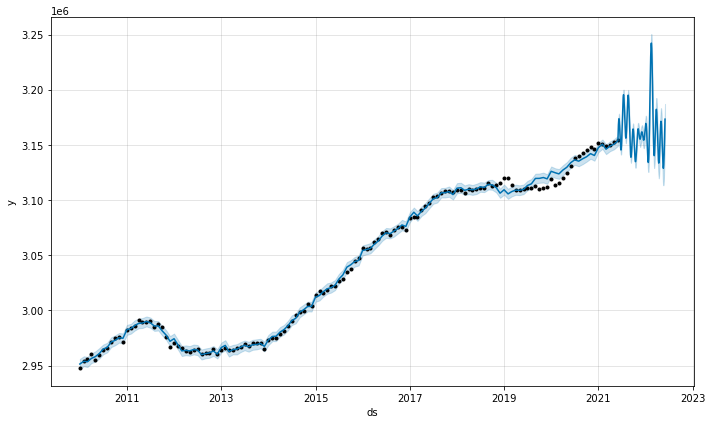

In [150]:
fig1 = m.plot(forecast)


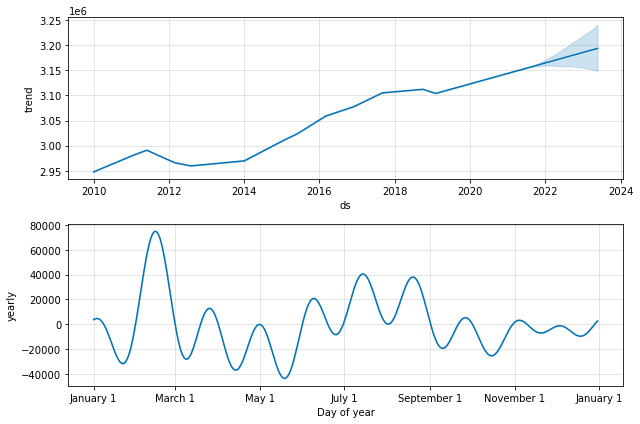

In [141]:
fig2 = m.plot_components(forecast)

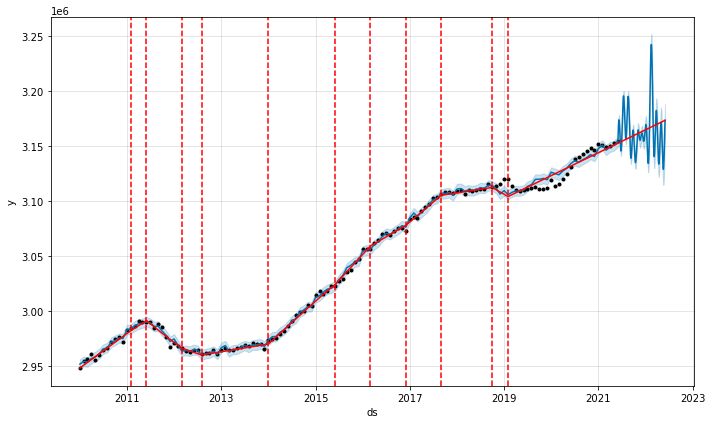

In [136]:
# 빨간선(트랜드선) 변화주기
from fbprophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [144]:
prophet = Prophet(seasonality_mode='multiplicative', 
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(df)

In [146]:
 

# 5일을 내다보며 예측합니다.
future_data = prophet.make_future_dataframe(periods=365, freq='d')
forecast_data = prophet.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
498,2022-05-28,3.153912e+06,3.126544e+06,3.180175e+06
499,2022-05-29,3.157567e+06,3.129980e+06,3.183782e+06
500,2022-05-30,3.163628e+06,3.136376e+06,3.191442e+06
501,2022-05-31,3.169708e+06,3.142657e+06,3.196233e+06
502,2022-06-01,3.172787e+06,3.145784e+06,3.199970e+06


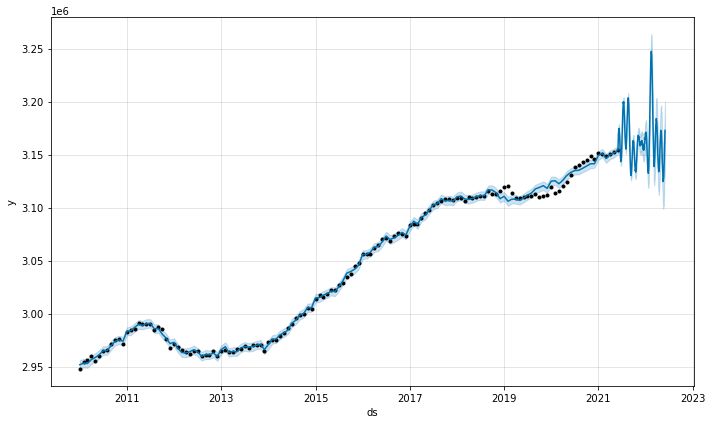

In [147]:
fig1 = prophet.plot(forecast_data)